# **Sistem Rekomendasi - Aryo Daffa Khairuddin**

### Link Dataset : [Fashion Product](https://www.kaggle.com/datasets/bhanupratapbiswas/fashion-products/data)

### Link Full Project : https://github.com/aryo04/Sistem-Rekomendasi

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import OneHotEncoder


**Insigh**t :
* `pandas`: Untuk mengolah dan menganalisis data dalam format tabel.
* `numpy`: Untuk operasi angka dan array.
* `matplotlib.pyplot` dan `seaborn`: Untuk membuat grafik dan visualisasi data
* `sklearn.metrics.pairwise - cosine_similarity`, `euclidean_distances` : Untuk menghitung kemiripan antar vektor fitur.
* `sklearn.preprocessing - OneHotEncoder`: Untuk mengubah data kategorikal menjadi format numerik biner yang dapat diproses model machine learning.

# **Load Data**

In [2]:
df = pd.read_csv('fashion_products.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


**Insight** :  Memuat file CSV "fashion_products.csv" dan melihat isi awal dataset dengan menampilkan 5 baris pertama.

# **Data Understanding**

In [3]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 1000
Jumlah kolom: 9


**Insight** : df.shape() digunakan untuk mengetahui jumlah baris dan kolom dimana dari dataset tersebut mempunyai 1000 baris dan 9 kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


**Insight** : df.info() digunakan untuk menampilkan struktur dataset, termasuk jumlah baris baris, nama kolom, jumlah non-null, serta tipe data dari masing-masing kolom.

In [5]:
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


**Insight** :

* `User ID` dan `Product ID` menunjukkan interaksi dari 100 user terhadap 1000 produk dengan distribusi yang cukup merata.
* `Price` harga produk dimulai dari 10-100.
* `Rating` rating  dimulai dari 1 sampai hampir 5 dengan rata-rata hampir 3.

In [6]:
rating_counts = df['Rating'].value_counts()
print(rating_counts)
print(f"\nTotal rating dengan 0: {rating_counts.get(0, 0)}")

Rating
3.093553    1
1.043159    1
4.026416    1
3.337938    1
1.049523    1
           ..
1.601194    1
2.699736    1
1.160988    1
4.093234    1
4.466182    1
Name: count, Length: 1000, dtype: int64

Total rating dengan 0: 0


**Insight** :

Tidak terdapat rating dengan nilai 0.

In [7]:
df.isnull().sum()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


**Insight** :

Tidak terdapat missing value.

In [8]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data yang duplikat.

## **Eksploratory Data Analyst**

### Distribusi Variabel Kategorikal

<ipython-input-9-f3068a54e53d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')
<ipython-input-9-f3068a54e53d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Brand', palette='viridis')
<ipython-input-9-f3068a54e53d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Color', palette='viridis')
<ipython-input-9-f3068a54e53d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and se

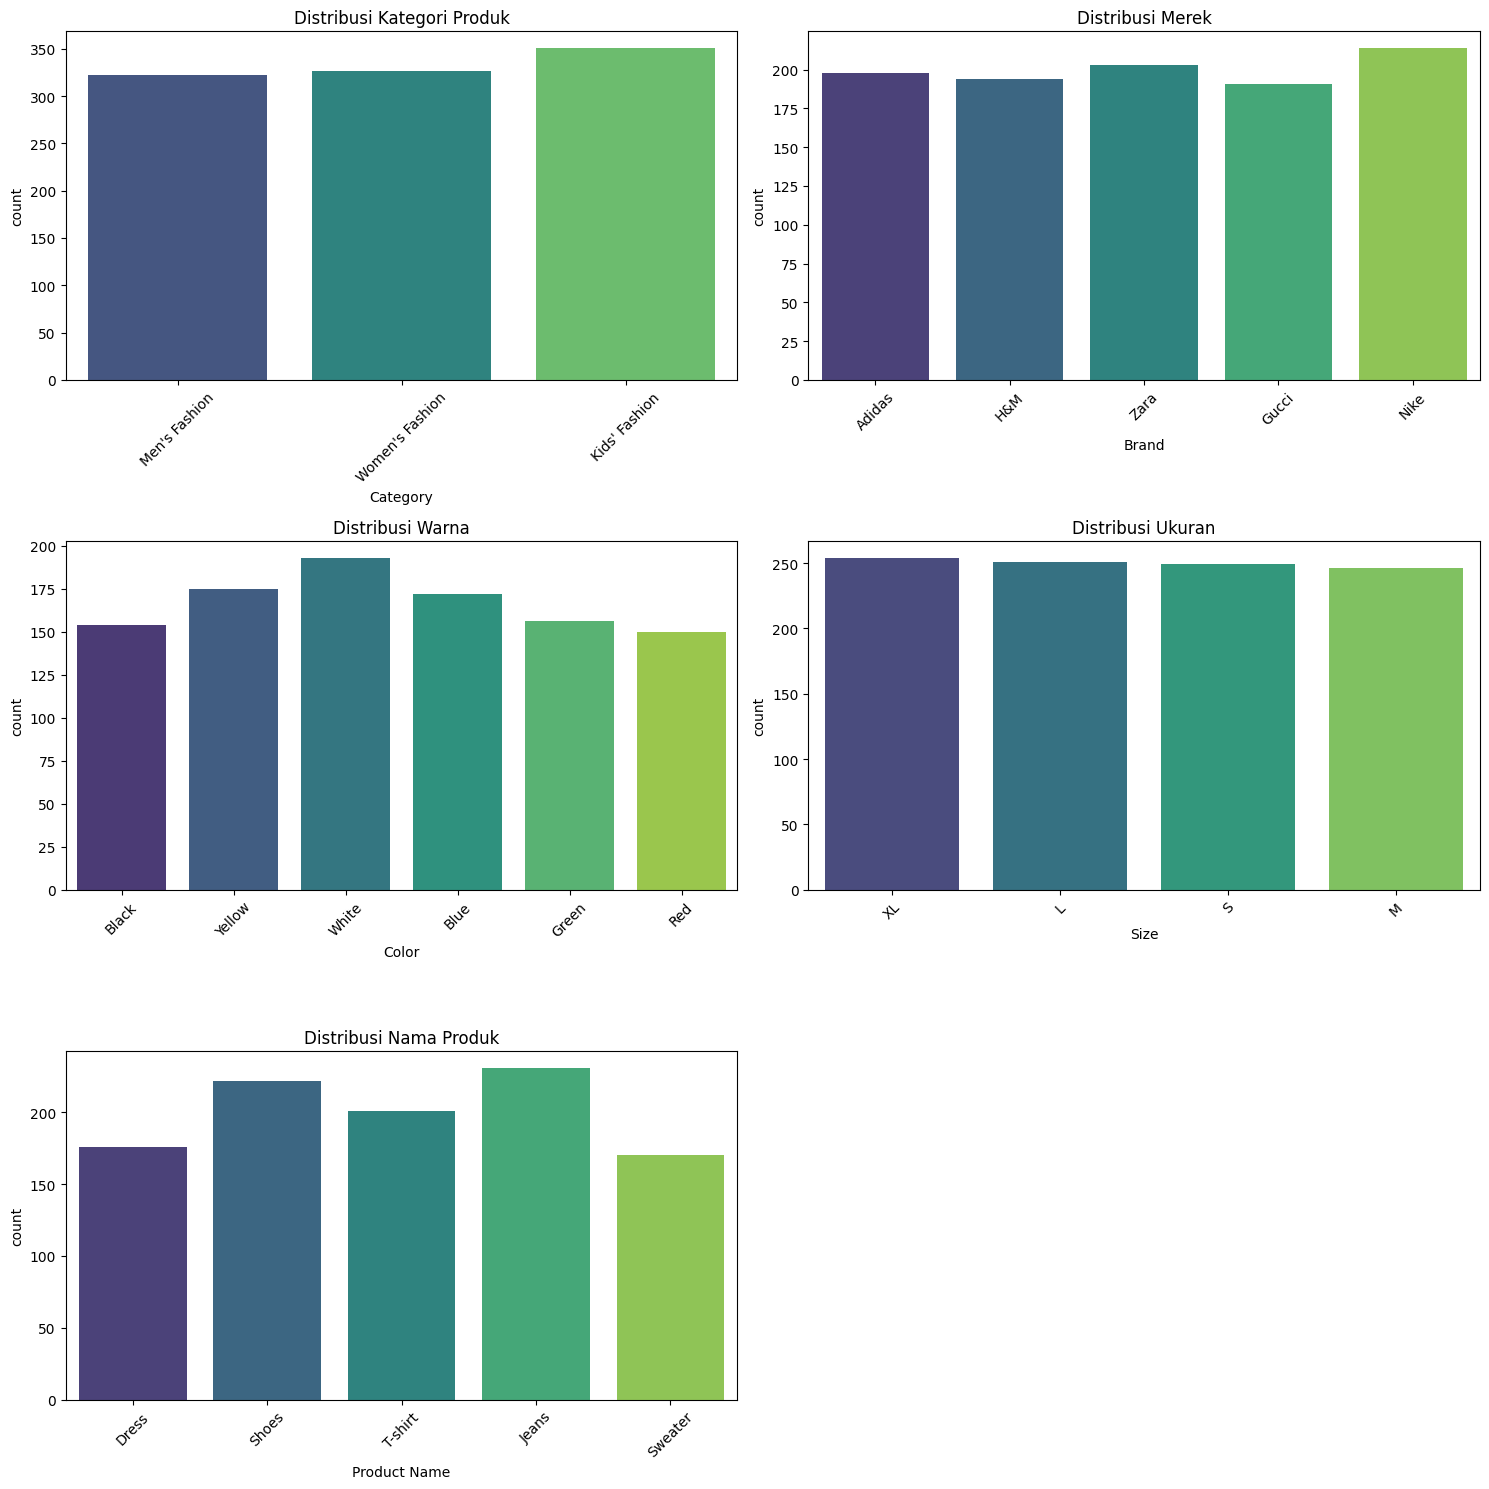

In [9]:
plt.figure(figsize=(15, 15))

# Plot distribusi Kategori
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Distribusi Kategori Produk')
plt.xticks(rotation=45)

# Plot distribusi Merek
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='Brand', palette='viridis')
plt.title('Distribusi Merek')
plt.xticks(rotation=45)

# Plot distribusi Warna
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='Color', palette='viridis')
plt.title('Distribusi Warna')
plt.xticks(rotation=45)

# Plot distribusi Ukuran
plt.subplot(3, 2, 4)
sns.countplot(data=df, x='Size', palette='viridis')
plt.title('Distribusi Ukuran')
plt.xticks(rotation=45)

# Plot distribusi Ukuran
plt.subplot(3, 2, 5)
sns.countplot(data=df, x='Product Name', palette='viridis')
plt.title('Distribusi Nama Produk')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Insight** :

1. `Category` : Tiga kategori fashion (Men’s, Women’s, Kid’s) memiliki distribusi yang cukup seimbang, namun Kid’s Fashion sedikit lebih tinggi.

2. `Brand` : Semua brand populer (Adidas, H&M, Zara, Gucci, Nike) memiliki jumlah produk yang hampir merata, dengan Nike sedikit lebih tinggi.

3. `Color` : Warna White paling sering muncul, diikuti oleh Yellow dan Blue. Warna Red paling sedikit.

4. `Size` : Distribusi merata dengan XL dan L sedikit lebih tinggi dibandingkan s dan m.

5. `Product Name` : Produk Jeans dan Shoes paling tinggi, sementara Sweater memiliki jumlah paling sedikit.

### Distribusi Rating per Kategori

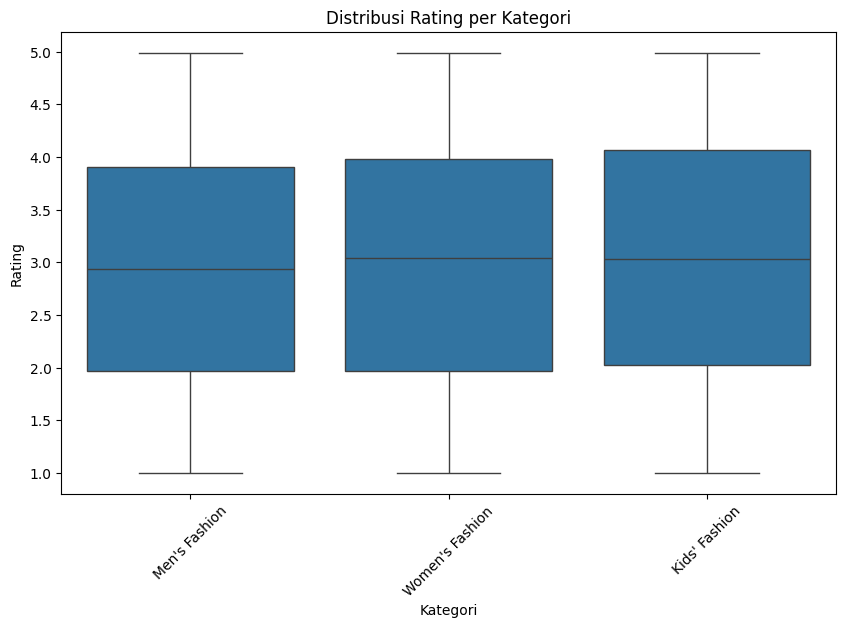

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Distribusi Rating per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**Insight** :

* Ketiga kategori (`Men's Fashion, Women's Fashion, dan Kids Fashion`) menunjukkan distribusi rating yang serupa, dengan rentang rating dari 1 hingga 5.

* Median rating dari ketiga kategori berada di sekitar 3, dengan:

  * `Women's Fashion` dan `Kid's Fashion` memiliki median sedikit lebih tinggi dari `Men's Fashion`.

  * Ini mengindikasikan bahwa produk di dua kategori tersebut cenderung mendapat penilaian lebih tinggi secara konsisten dibanding `Men's Fashion`.

* IQR terlihat cukup lebar di semua kategori, menunjukkan keragaman penilaian pengguna cukup besar.

### Rata-rata Rating per Kategori

<ipython-input-11-e3294e9bf25e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='Blues')


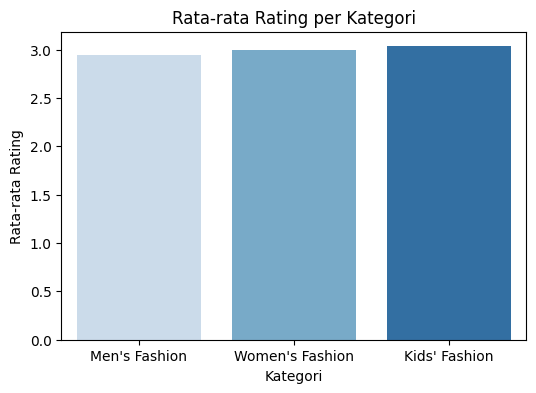

In [11]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='Blues')
plt.title('Rata-rata Rating per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Rata-rata Rating')
plt.show()


**Insight** :

1. `Kids' Fashion` memiliki rata-rata rating tertinggi

  Nilai rata-rata rating kategori ini sedikit di atas 3.0, menunjukkan bahwa secara umum, produk-produk Kids' Fashion lebih disukai oleh pelanggan dibanding dua kategori lainnya.

2. `Women's Fashion` berada di urutan kedua

  Rata-rata rating-nya tepat di angka 3.0, menandakan kepuasan pelanggan yang cukup baik dan stabil.

3. `Men's Fashion` memiliki rata-rata rating terendah

  Dengan rata-rata rating sedikit di bawah 3.0, Men's Fashion tampaknya memiliki performa penilaian pengguna yang sedikit lebih rendah dibandingkan dua kategori lainnya.

### Distribusi Variabel Numerik

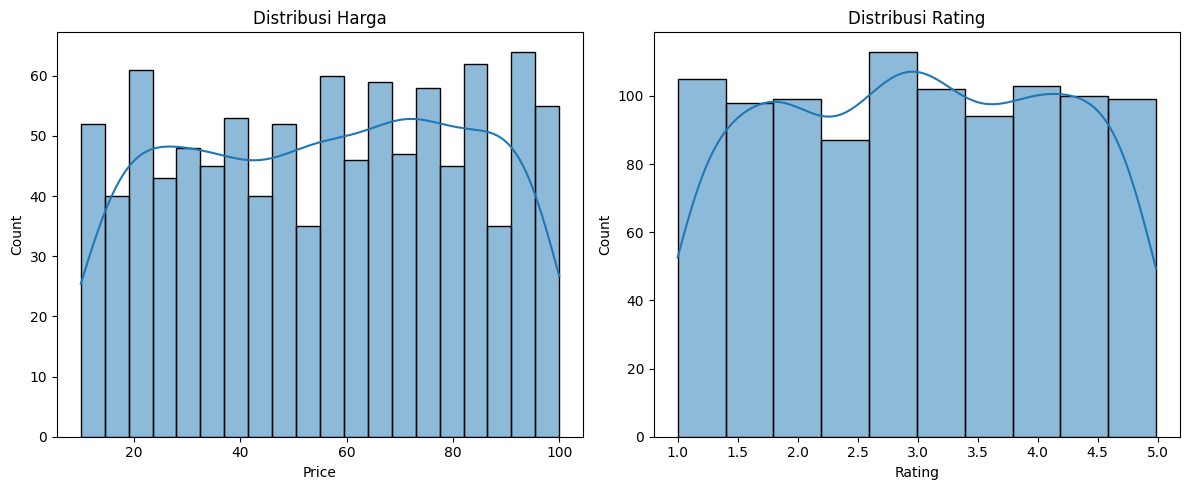

In [12]:
plt.figure(figsize=(12, 5))

# Plot distribusi Harga
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Price', kde=True, bins=20)
plt.title('Distribusi Harga')

# Plot distribusi Rating
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Rating', kde=True, bins=10)
plt.title('Distribusi Rating')

plt.tight_layout()
plt.show()

**Insight** :

* Harga produk tersebar merata di rentang 10 hingga 100 dan distribusi harga cenderung datar, menunjukkan ketersediaan produk di berbagai level harga secara seimbang.

* Rating tersebar dari 1 hingga 5, dengan puncak pada rating 3 dan Rrating 1 dan 5 juga cukup tinggi, menunjukkan pengalaman pengguna yang beragam—baik sangat puas maupun sangat tidak puas.

# **Data Preparation**

### Seleksi Fitur

In [13]:
# Memilih fitur untuk rekomendasi
features = ['Product Name', 'Brand', 'Category', 'Color', 'Size']
data_features = df[features]

**Insight** : Seleksi fitur dilakukan untuk menentukan atribut yang paling relevan dalam menghasilkan rekomendasi yang bermakna. Fitur Product Name, Brand, Category, Color, dan Size dipilih karena mewakili karakteristik utama produk fashion yang memengaruhi preferensi pengguna

### Encoding

In [14]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data_features)
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features))

**Insight** : Fitur seperti Product Name, Brand, Category, Color, dan Size bersifat kategorikal, sedangkan cosine similarity memerlukan data dalam format numerik. One-Hot Encoding mengubah setiap kategori menjadi vektor biner, memungkinkan perhitungan kesamaan matematis antar produk dan sistem dapat mengukur jarak atau kesamaan antar produk berdasarkan atribut ini.

### Penggabungan Data

In [15]:
# Menambahkan kolom asli untuk referensi
encoded_df = pd.concat([encoded_df, df[['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'Rating', 'Price']]], axis=1)

**Insight** : Setelah encoding, DataFrame hanya berisi vektor biner yang sulit diinterpretasikan tanpa konteks asli. Menambahkan kolom referensi seperti Product ID, Product Name, Brand, Category, Color, Size, Rating, dan Price memungkinkan pengguna untuk memahami produk yang direkomendasikan dengan jelas.

# **Modeling**

### Consine Similartiy

In [16]:
cosine_sim = cosine_similarity(encoded_df[encoder.get_feature_names_out(features)])
cosine_sim

array([[1. , 0.2, 0.6, ..., 0.2, 0. , 0.2],
       [0.2, 1. , 0.2, ..., 0.2, 0.2, 0.6],
       [0.6, 0.2, 1. , ..., 0. , 0.2, 0.4],
       ...,
       [0.2, 0.2, 0. , ..., 1. , 0.2, 0.4],
       [0. , 0.2, 0.2, ..., 0.2, 1. , 0.2],
       [0.2, 0.6, 0.4, ..., 0.4, 0.2, 1. ]])

**Insight** : menghitung cosine similarity antara semua produk dalam dataset berdasarkan fitur yang telah dienkode.

In [17]:
# Fungsi untuk mendapatkan rekomendasi berdasarkan atribut degnan consine similarity
def get_recommendations_by_attributes(product_name, brand, category, color, size, top_n=5):
    input_data = pd.DataFrame({
        'Product Name': [product_name],
        'Brand': [brand],
        'Category': [category],
        'Color': [color],
        'Size': [size]
    })
    input_encoded = encoder.transform(input_data)
    sim_scores = cosine_similarity(input_encoded, encoded_df[encoder.get_feature_names_out(features)])
    sim_scores = list(enumerate(sim_scores[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:top_n]
    product_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    recommendations = df.iloc[product_indices][['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'Rating', 'Price']].copy()
    recommendations['Similarity Score'] = similarity_scores
    return recommendations, product_indices, similarity_scores

# --- Test Case ---
product_name = 'Shoes'
brand = 'Zara'
category = "Men's Fashion"
color = 'White'
size = 'S'

# --- Menghasilkan dan Menampilkan Rekomendasi ---
print("\nRekomendasi (Cosine Similarity):")
recommendations, _, _ = get_recommendations_by_attributes(
    product_name, brand, category, color, size, top_n=5
)
print(recommendations)


Rekomendasi (Cosine Similarity):
     Product ID Product Name Brand       Category  Color Size    Rating  \
3             4        Shoes  Zara  Men's Fashion  White    S  1.049523   
235         236        Shoes  Zara  Men's Fashion  White    S  1.718298   
667         668        Shoes  Zara  Men's Fashion  White    S  1.842279   
713         714        Shoes  Zara  Men's Fashion  White    S  2.491495   
92           93        Shoes  Nike  Men's Fashion  White    S  4.928128   

     Price  Similarity Score  
3       23               1.0  
235     44               1.0  
667     11               1.0  
713     35               1.0  
92      70               0.8  


**Insight** : fungsi di atas adalah komponen operasional dari model, yang menerima input atribut pengguna (Product Name, Brand, Category, Color, Size) dan mengembalikan top-5 rekomendasi produk berdasarkan kesamaan dengan input.

### Euclidean Distance

In [18]:
# Menghitung Matriks Jarak Euclidean
euclidean_dist = euclidean_distances(encoded_df[encoder.get_feature_names_out(features)])
euclidean_sim = 1 / (1 + euclidean_dist)
euclidean_sim

array([[1.        , 0.26120387, 0.33333333, ..., 0.26120387, 0.24025307,
        0.26120387],
       [0.26120387, 1.        , 0.26120387, ..., 0.26120387, 0.26120387,
        0.33333333],
       [0.33333333, 0.26120387, 1.        , ..., 0.24025307, 0.26120387,
        0.28989795],
       ...,
       [0.26120387, 0.26120387, 0.24025307, ..., 1.        , 0.26120387,
        0.28989795],
       [0.24025307, 0.26120387, 0.26120387, ..., 0.26120387, 1.        ,
        0.26120387],
       [0.26120387, 0.33333333, 0.28989795, ..., 0.28989795, 0.26120387,
        1.        ]])

**Insight** : Menghitung matriks jarak euclidean antara semua pasangan produk berdasarkan fitur yang telah dienkode.

In [19]:
# Fungsi untuk mendapatkan rekomendasi berdasarkan atribut dengan ecludian distances
def get_recommendations_by_attributes_euclidean(product_name, brand, category, color, size, top_n=5):
    input_data = pd.DataFrame({
        'Product Name': [product_name],
        'Brand': [brand],
        'Category': [category],
        'Color': [color],
        'Size': [size]
    })
    input_encoded = encoder.transform(input_data)
    dist_scores = euclidean_distances(input_encoded, encoded_df[encoder.get_feature_names_out(features)])
    sim_scores = 1 / (1 + dist_scores[0])
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:top_n]

    product_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]
    recommendations = df.iloc[product_indices][['Product ID', 'Product Name', 'Brand', 'Category', 'Color', 'Size', 'Rating', 'Price']].copy()
    recommendations['Similarity Score'] = similarity_scores
    return recommendations, product_indices, similarity_scores

# Test case
product_name = 'Shoes'
brand = 'Zara'
category = "Men's Fashion"
color = 'White'
size = 'S'

# Menampilkan Rekomendasi
print("\nRekomendasi (Euclidean Distance):")
recommendations, _, _ = get_recommendations_by_attributes_euclidean(
    product_name, brand, category, color, size, top_n=5
)
print(recommendations)


Rekomendasi (Euclidean Distance):
     Product ID Product Name Brand       Category  Color Size    Rating  \
3             4        Shoes  Zara  Men's Fashion  White    S  1.049523   
235         236        Shoes  Zara  Men's Fashion  White    S  1.718298   
667         668        Shoes  Zara  Men's Fashion  White    S  1.842279   
713         714        Shoes  Zara  Men's Fashion  White    S  2.491495   
92           93        Shoes  Nike  Men's Fashion  White    S  4.928128   

     Price  Similarity Score  
3       23          1.000000  
235     44          1.000000  
667     11          1.000000  
713     35          1.000000  
92      70          0.414214  


**Insight** : Fungsi menerima input atribut, kemudian menghitung jarak Euclidean antara input dan semua produk, mengonversi ke skor kesamaan, lalu memilih top-5 produk dengan kesamaan tertinggi.

# **Evaluation**

### Cosine Similarity

In [20]:
# Fungsi untuk menghitung Precision@5 dan Recall@5
def evaluate_recommendations(product_name, brand, category, color, size, top_n=5, similarity_threshold=0.9):
    recommendations, product_indices, similarity_scores = get_recommendations_by_attributes(
        product_name, brand, category, color, size, top_n
    )
    relevant_items = []
    input_data = pd.DataFrame({
        'Product Name': [product_name],
        'Brand': [brand],
        'Category': [category],
        'Color': [color],
        'Size': [size]
    })
    input_encoded = encoder.transform(input_data)
    sim_scores_all = cosine_similarity(input_encoded, encoded_df[encoder.get_feature_names_out(features)])[0]
    relevant_items = [i for i, score in enumerate(sim_scores_all) if score >= similarity_threshold]

    relevant_recommendations = sum(1 for idx in product_indices if idx in relevant_items)
    precision = relevant_recommendations / top_n if top_n > 0 else 0
    total_relevant = len(relevant_items)
    recall = relevant_recommendations / total_relevant if total_relevant > 0 else 0

    return recommendations, precision, recall, total_relevant

# Test case
product_name = 'Shoes'
brand = 'Zara'
category = "Men's Fashion"
color = 'White'
size = 'S'

# Evaluasi
recommendations, precision, recall, total_relevant = evaluate_recommendations(
    product_name, brand, category, color, size, top_n=5, similarity_threshold=0.8
)

# Menampilkan rekomendasi dan hasil evaluasi
print("\nRekomendasi Cosine Similarty:")
print(recommendations)
print(f"\nPrecision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Total Item Relevan: {total_relevant}")


Rekomendasi Cosine Similarty:
     Product ID Product Name Brand       Category  Color Size    Rating  \
3             4        Shoes  Zara  Men's Fashion  White    S  1.049523   
235         236        Shoes  Zara  Men's Fashion  White    S  1.718298   
667         668        Shoes  Zara  Men's Fashion  White    S  1.842279   
713         714        Shoes  Zara  Men's Fashion  White    S  2.491495   
92           93        Shoes  Nike  Men's Fashion  White    S  4.928128   

     Price  Similarity Score  
3       23               1.0  
235     44               1.0  
667     11               1.0  
713     35               1.0  
92      70               0.8  

Precision@5: 0.80
Recall@5: 1.00
Total Item Relevan: 4


**Insight** : Hasil evaluasi menunjukkan bahwa sistem rekomendasi berbasis cosine similarity memiliki Precision@5 sebesar 0.80 dan Recall@5 sebesar 1.00. Artinya, dari 5 item yang direkomendasikan, 4 di antaranya relevan dengan preferensi pengguna, dan seluruh item relevan berhasil ditemukan. Hal ini menunjukkan bahwa sistem cukup akurat dan sangat efektif dalam menemukan produk yang sesuai dengan kebutuhan pengguna.

### Euclidean Distance

In [21]:
# Fungsi untuk Menghitung Precision@5 dan Recall@5
def evaluate_recommendations_euclidean(product_name, brand, category, color, size, top_n=5, similarity_threshold=0.9):
    recommendations, product_indices, similarity_scores = get_recommendations_by_attributes_euclidean(
        product_name, brand, category, color, size, top_n
    )
    relevant_items = []
    input_data = pd.DataFrame({
        'Product Name': [product_name],
        'Brand': [brand],
        'Category': [category],
        'Color': [color],
        'Size': [size]
    })
    input_encoded = encoder.transform(input_data)
    dist_scores = euclidean_distances(input_encoded, encoded_df[encoder.get_feature_names_out(features)])[0]
    sim_scores_all = 1 / (1 + dist_scores)
    relevant_items = [i for i, score in enumerate(sim_scores_all) if score >= similarity_threshold]

    relevant_recommendations = sum(1 for idx in product_indices if idx in relevant_items)
    precision = relevant_recommendations / top_n if top_n > 0 else 0
    total_relevant = len(relevant_items)
    recall = relevant_recommendations / total_relevant if total_relevant > 0 else 0

    return recommendations, precision, recall, total_relevant

# Test case
product_name = 'Shoes'
brand = 'Zara'
category = "Men's Fashion"
color = 'White'
size = 'S'

# Evaluasi
recommendations, precision, recall, total_relevant = evaluate_recommendations_euclidean(
    product_name, brand, category, color, size, top_n=5, similarity_threshold=0.8
)

# Menampilkan Hanya Rekomendasi dan Hasil Evaluasi
print("\nRekomendasi Ecludean Distance:")
print(recommendations)
print(f"\nPrecision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")
print(f"Total Item Relevan: {total_relevant}")


Rekomendasi Ecludean Distance:
     Product ID Product Name Brand       Category  Color Size    Rating  \
3             4        Shoes  Zara  Men's Fashion  White    S  1.049523   
235         236        Shoes  Zara  Men's Fashion  White    S  1.718298   
667         668        Shoes  Zara  Men's Fashion  White    S  1.842279   
713         714        Shoes  Zara  Men's Fashion  White    S  2.491495   
92           93        Shoes  Nike  Men's Fashion  White    S  4.928128   

     Price  Similarity Score  
3       23          1.000000  
235     44          1.000000  
667     11          1.000000  
713     35          1.000000  
92      70          0.414214  

Precision@5: 0.80
Recall@5: 1.00
Total Item Relevan: 4


**Insight** : Hasil evaluasi menunjukkan bahwa sistem rekomendasi berbasis Euclidean distance memiliki Precision@5 sebesar 0.80 dan Recall@5 sebesar 1.00. Artinya, dari 5 item yang direkomendasikan, 4 item relevan dengan preferensi pengguna (80%), dan semua item relevan yang tersedia berhasil direkomendasikan (100% recall). Dengan demikian, sistem sangat efektif dalam menemukan item yang sesuai kebutuhan pengguna dan memberikan rekomendasi yang cukup akurat.